In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits

In [3]:
load_digits()['data'].shape

(1797, 64)

In [4]:
a = load_digits()['data'][1]

In [5]:
a = a.reshape(8,8)

In [6]:
import matplotlib.pyplot as plt

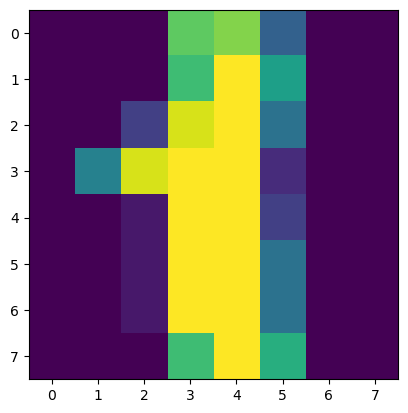

In [7]:
plt.imshow(a)

In [8]:
load_digits()['target'][1]

1

In [9]:
load_digits()['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
load_digits()['target'][0]

0

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(load_digits()['data'],load_digits()['target'])

In [13]:
tree_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
bayes_model = GaussianNB()
svm_model = SVC()

In [14]:
tree_model.fit(X_train,y_train)
lr_model.fit(X_train,y_train)
bayes_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [15]:
print(f'의사결정트리 accuracy : {tree_model.score(X_test,y_test)}')
print(f'로지스틱회귀 accuracy : {lr_model.score(X_test,y_test)}')
print(f'나이브베이지안 accuracy : {bayes_model.score(X_test,y_test)}')
print(f'서포트벡터머신 accuracy : {svm_model.score(X_test,y_test)}')

의사결정트리 accuracy : 0.8333333333333334
로지스틱회귀 accuracy : 0.9666666666666667
나이브베이지안 accuracy : 0.8088888888888889
서포트벡터머신 accuracy : 0.9822222222222222


In [16]:
svm_model = SVC(kernel = 'linear')

In [17]:
svm_model.fit(X_train,y_train)
svm_model.score(X_test,y_test)

0.9755555555555555

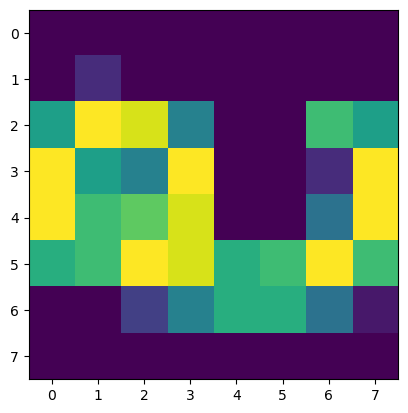

In [18]:
plt.imshow(X_test[1].reshape(8,8).T)

In [19]:
new_data = X_test[1].reshape(8,8).T

In [20]:
new_data = new_data.reshape(1,64)

In [21]:
print(f'의사결정트리 예측값 : {tree_model.predict(new_data)}')
print(f'로지스틱회귀 예측값 : {lr_model.predict(new_data)}')
print(f'나이브베이지안 예측값 : {bayes_model.predict(new_data)}')
print(f'서포트벡터머신 예측값 : {svm_model.predict(new_data)}')

의사결정트리 예측값 : [4]
로지스틱회귀 예측값 : [4]
나이브베이지안 예측값 : [4]
서포트벡터머신 예측값 : [4]


In [22]:
from sklearn.datasets import load_iris

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(load_iris()['data'])
X = pca.transform(load_iris()['data'])

In [24]:
x_axis_min, x_axis_max = np.min(X[:,0]), np.max(X[:,0])
y_axis_min, y_axis_max = np.min(X[:,1]), np.max(X[:,1])

In [25]:
y_axis_min, y_axis_max

(-1.265971190526394, 1.374165086793049)

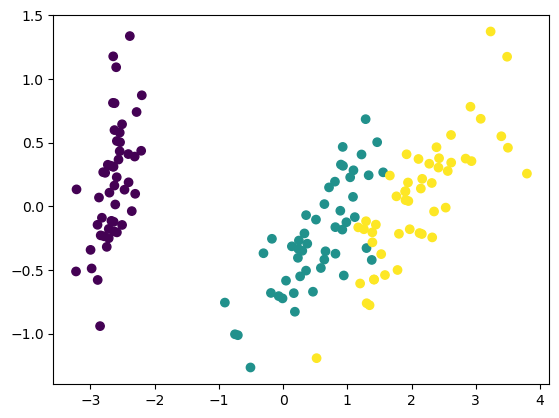

In [27]:
plt.scatter(X[:,0],X[:,1],c=load_iris()['target'])

In [74]:
linear_kernel = SVC(kernel='linear')
sigmoid_model = SVC(kernel='sigmoid')
rbf_model = SVC(kernel='rbf')

SVC(kernel='linear')

In [77]:
linear_kernel.fit(X,load_iris()['target'])
sigmoid_model.fit(X,load_iris()['target'])
rbf_model.fit(X,load_iris()['target'])

SVC()

In [63]:
x1 = np.linspace(x_axis_min - 1, x_axis_max + 1, 500)
x2 = np.linspace(y_axis_min - 1, y_axis_max + 1, 500)

In [66]:
y1, y2 = np.meshgrid(x1,x2)
np.c_[y1[0,:],y2[0,:]].shape

(500, 2)

In [67]:
predict = np.zeros((500*500,3))

In [68]:
predict.shape

(250000, 3)

In [82]:
for i in range(500):
    j = i+1
    pr = sigmoid_model.predict(np.c_[y1[i,:],y2[i,:]])
    result = np.c_[y1[i,:],y2[i,:],pr]
    predict[i*500:(i+1)*500,:] = result

In [80]:
predict.shape

(250000, 3)

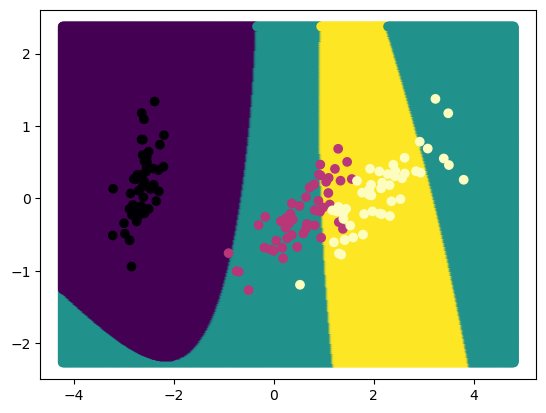

In [83]:
plt.scatter(predict[:,0],predict[:,1],c=predict[:,2])
plt.scatter(X[:,0],X[:,1],c=load_iris()['target'], cmap='magma')

In [53]:
linear_predict = linear_kernel.predict(np.c_[x1,x2])

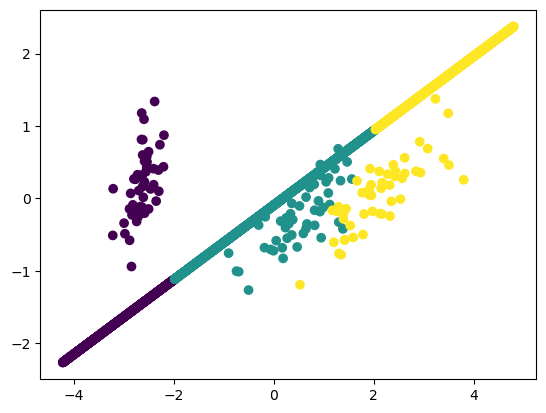

In [35]:
plt.scatter(x1,x2,c=linear_predict)
plt.scatter(X[:,0],X[:,1],c=load_iris()['target'])

In [116]:
def svm_graph(X,y,kernel,grid=100):
    model = SVC(kernel=kernel)
    model.fit(X,y)
    x1, x2 = X[:,0], X[:,1]
    x_axis_min, x_axis_max = np.min(x1) -2*np.std(x1), np.max(x1) + 2*np.std(x1)
    y_axis_min, y_axis_max = np.min(x2) -2*np.std(x2), np.max(x2) + 2*np.std(x2)
    x_axis = np.linspace(x_axis_min, x_axis_max,grid)
    y_axis = np.linspace(y_axis_min, y_axis_max,grid)
    new_x1, new_x2 = np.meshgrid(x_axis, y_axis)
    predict = np.zeros((grid*grid,3))
    for i in range(grid):
        pr = model.predict(np.c_[new_x1[i,:],new_x2[i,:]])
        result = np.c_[new_x1[i,:],new_x2[i,:],pr]
        predict[i*grid:(i+1)*grid,:] = result
    x1_ = predict[:,0]
    x2_ = predict[:,1]
    c = predict[:,2]
    plt.scatter(x1_,x2_,c=c,cmap='gist_gray')
    plt.scatter(x1,x2,c=y,cmap='GnBu')
    plt.show()

In [85]:
y = load_iris()['target']

In [92]:
svm_model = SVC(kernel='linear')
svm_model.fit(X,y)

SVC(kernel='linear')

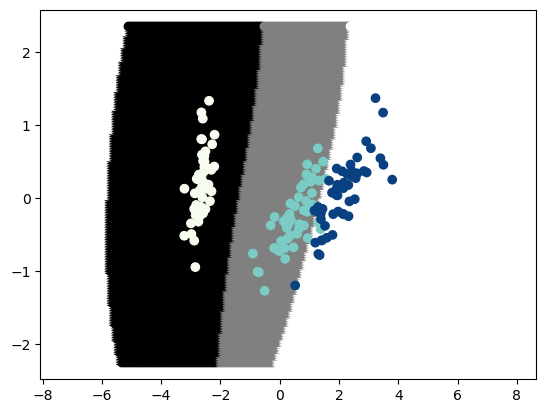

In [117]:
svm_graph(X,y,'rbf',200)

In [142]:
def svm_graph(X,y,kernel,grid=100):
    model = SVC(kernel=kernel)
    model.fit(X,y)
    x1, x2 = X[:,0], X[:,1]
    x_axis_min, x_axis_max = np.min(x1) -2*np.std(x1), np.max(x1) + 2*np.std(x1)
    y_axis_min, y_axis_max = np.min(x2) -2*np.std(x2), np.max(x2) + 2*np.std(x2)
    x_axis = np.linspace(x_axis_min, x_axis_max,grid)
    y_axis = np.linspace(y_axis_min, y_axis_max,grid)
    new_x1, new_x2 = np.meshgrid(x_axis, y_axis)
    new_x = np.c_[new_x1.flatten(),new_x2.flatten()]
    pr = model.predict(new_x)
    plt.scatter(new_x[:,0],new_x[:,1],c=pr,cmap='gist_gray')
    plt.scatter(x1,x2,c=y,cmap='GnBu')
    plt.show()

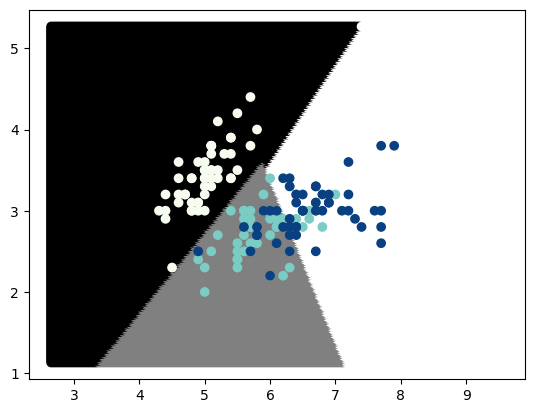

In [147]:
svm_graph(load_iris()['data'][:,:2],load_iris()['target'],'linear',200)

In [120]:
from sklearn.datasets import load_wine

In [122]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [130]:
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = LogisticRegression()
model5 = GaussianNB()

In [132]:
X = load_wine()['data']
y = load_wine()['target']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [136]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [175]:
import pandas as pd
result = pd.DataFrame(np.c_[model1.predict(X_test),
model2.predict(X_test),
model3.predict(X_test),
model4.predict(X_test),
model5.predict(X_test)])

In [160]:
from collections import Counter

In [163]:
cnt = Counter(x)

In [164]:
cnt.most_common()[0][0]

0

In [165]:
def get_result(x):
    cnt = Counter(x)
    return cnt.most_common()[0][0]

In [181]:
from sklearn.metrics import accuracy_score
accuracy_score(result.apply(get_result,1),y_test)

0.9777777777777777

In [221]:
def vote_clf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model1 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
    model2 = DecisionTreeClassifier().fit(X_train,y_train)
    model3 = SVC().fit(X_train,y_train)
    model4 = LogisticRegression().fit(X_train,y_train)
    model5 = GaussianNB().fit(X_train,y_train)
    pr1 = model1.predict(X_test)
    pr2 = model2.predict(X_test)
    pr3 = model3.predict(X_test)
    pr4 = model4.predict(X_test)
    pr5 = model5.predict(X_test)
    pr1_acc = accuracy_score(pr1,y_test)
    pr2_acc = accuracy_score(pr2,y_test)
    pr3_acc = accuracy_score(pr3,y_test)
    pr4_acc = accuracy_score(pr4,y_test)
    pr5_acc = accuracy_score(pr5,y_test)
    vote_acc = accuracy_score(pd.DataFrame(np.c_[pr1,pr2,pr3,pr4,pr5]).apply(get_result,1),y_test)
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'의사결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(하드보팅) 정확도 : {vote_acc}')

In [222]:
X = load_wine()['data']
y = load_wine()['target']
vote_clf(X,y)

최근접 이웃 정확도 : 0.7555555555555555
의사결정트리 정확도 : 0.9555555555555556
지지벡터머신 정확도 : 0.6888888888888889
로지스틱회귀 정확도 : 0.9777777777777777
나이브베이지안 정확도 : 0.9777777777777777
앙상블(하드보팅) 정확도 : 0.9777777777777777


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
def vote_clf_proba(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
    model2 = DecisionTreeClassifier().fit(X_train,y_train)
    model3 = SVC(probability=True).fit(X_train,y_train)
    model4 = LogisticRegression().fit(X_train,y_train)
    model5 = GaussianNB().fit(X_train,y_train)
    pr1 = model1.predict_proba(X_test)
    pr2 = model2.predict_proba(X_test)
    pr3 = model3.predict_proba(X_test)
    pr4 = model4.predict_proba(X_test)
    pr5 = model5.predict_proba(X_test)
    pr1_acc = accuracy_score(np.argmax(pr1,1),y_test)
    pr2_acc = accuracy_score(np.argmax(pr2,1),y_test)
    pr3_acc = accuracy_score(np.argmax(pr3,1),y_test)
    pr4_acc = accuracy_score(np.argmax(pr4,1),y_test)
    pr5_acc = accuracy_score(np.argmax(pr5,1),y_test)
    vote_acc = accuracy_score(np.argmax(pr1+pr2+pr3+pr4+pr5,1),y_test)
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'의사결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(소프트보팅) 정확도 : {vote_acc}')

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = GaussianNB().fit(X_train,y_train)

In [254]:
vote_clf_proba(X_test,y_test)

최근접 이웃 정확도 : 0.5
의사결정트리 정확도 : 0.8333333333333334
지지벡터머신 정확도 : 0.6666666666666666
로지스틱회귀 정확도 : 0.9166666666666666
나이브베이지안 정확도 : 0.9166666666666666
앙상블(소프트보팅) 정확도 : 0.9166666666666666


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [250]:
X = load_wine()['data']
y = load_wine()['target']
X_train, X_test, y_train, y_test = train_test_split(X,y)

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_model.score(X_test,y_test)

0.9777777777777777

In [251]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train,y_train)
ada_clf.score(X_test,y_test)

0.9111111111111111

In [280]:
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = LogisticRegression()
model5 = GaussianNB()

model1.fit(X,y)
model2.fit(X,y)
model3.fit(X,y)
model4.fit(X,y)
model5.fit(X,y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [282]:
meta_model = RandomForestClassifier()
meta_model.fit(pd.DataFrame(np.c_[model1.predict(X),
model2.predict(X),
model3.predict(X),
model4.predict(X),
model5.predict(X)]),y)

RandomForestClassifier()

In [283]:
def stacking(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
    model2 = DecisionTreeClassifier().fit(X_train,y_train)
    model3 = SVC(probability=True).fit(X_train,y_train)
    model4 = LogisticRegression().fit(X_train,y_train)
    model5 = GaussianNB().fit(X_train,y_train)
    
    pr1 = model1.predict(X_train)
    pr2 = model2.predict(X_train)
    pr3 = model3.predict(X_train)
    pr4 = model4.predict(X_train)
    pr5 = model5.predict(X_train)
    
    new_x = np.c_[pr1,pr2,pr3,pr4,pr5]
    meta_model = RandomForestClassifier()
    meta_model.fit(new_x, y_train)
    
    pr1_ = model1.predict(X_test)
    pr2_ = model2.predict(X_test)
    pr3_ = model3.predict(X_test)
    pr4_ = model4.predict(X_test)
    pr5_ = model5.predict(X_test)
    
    pr1_acc = accuracy_score(pr1_,y_test)
    pr2_acc = accuracy_score(pr2_,y_test)
    pr3_acc = accuracy_score(pr3_,y_test)
    pr4_acc = accuracy_score(pr4_,y_test)
    pr5_acc = accuracy_score(pr5_,y_test)
    
    meta_test = np.c_[pr1_,pr2_,pr3_,pr4_,pr5_]
    meta_pr = meta_model.predict(meta_test)
    meta_acc = accuracy_score(meta_pr,y_test)
    
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'의사결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(스태킹) 정확도 : {meta_acc}')

In [284]:
stacking(X,y)

최근접 이웃 정확도 : 0.6444444444444445
의사결정트리 정확도 : 0.9555555555555556
지지벡터머신 정확도 : 0.6444444444444445
로지스틱회귀 정확도 : 0.9555555555555556
나이브베이지안 정확도 : 1.0
앙상블(스태킹) 정확도 : 0.9555555555555556


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
